# CMS Data Exercise 

## Author Infomation

Name : Darryn Johnson 

Date Last Updated : 2/2/2025

## Sources and Links

Original Dataset : [Payroll Based Journal Daily Nurse Staffing](https://data.cms.gov/quality-of-care/payroll-based-journal-daily-nurse-staffing/data)

Safety Code Scope Picture : [chfs.ky.gov](https://www.chfs.ky.gov/agencies/os/oig/dhc/Documents/ScopeSeverityGrid1.pdf)

# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

## Reproducability

# Business Understanding 

The purpose of the following notebook is to look into the data associated with staffing long-term care facilities. We will be using data such as `provider Name`, provider `City` and `State`, as well as other metrics used to identify 

# Exploritory Data Analysis

In [3]:
df = pd.read_csv('PBJ_Daily_Nurse_Staffing_Q2_2024.zip', encoding = 'Latin-1', low_memory = False)

In [4]:
health = pd.read_csv('NH_HealthCitations_Nov2024.csv', low_memory = False)

In [5]:
health.head(2)

,CMS Certification Number (CCN),Provider Name,Provider Address,City/Town,State,ZIP Code,Survey Date,Survey Type,Deficiency Prefix,Deficiency Category,Deficiency Tag Number,Deficiency Description,Scope Severity Code,Deficiency Corrected,Correction Date,Inspection Cycle,Standard Deficiency,Complaint Deficiency,Infection Control Inspection Deficiency,Citation under IDR,Citation under IIDR,Location,Processing Date
0,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2023-03-02,Health,F,Infection Control Deficiencies,880,Provide and implement an infection prevention ...,F,"Deficient, Provider has date of correction",2023-04-06,1,Y,N,N,N,N,"701 MONROE STREET NW,RUSSELLVILLE,AL,35653",2024-11-01
1,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2023-03-02,Health,F,Resident Assessment and Care Planning Deficien...,656,Develop and implement a complete care plan tha...,J,Past Non-Compliance,2023-01-13,1,Y,Y,N,N,N,"701 MONROE STREET NW,RUSSELLVILLE,AL,35653",2024-11-01


In [6]:
df.head(3)

,PROVNUM,PROVNAME,CITY,STATE,COUNTY_NAME,COUNTY_FIPS,CY_Qtr,WorkDate,MDScensus,Hrs_RNDON,Hrs_RNDON_emp,Hrs_RNDON_ctr,Hrs_RNadmin,Hrs_RNadmin_emp,Hrs_RNadmin_ctr,Hrs_RN,Hrs_RN_emp,Hrs_RN_ctr,Hrs_LPNadmin,Hrs_LPNadmin_emp,Hrs_LPNadmin_ctr,Hrs_LPN,Hrs_LPN_emp,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_emp,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_emp,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_emp,Hrs_MedAide_ctr
0,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,20240401,51,10.77,10.77,0.0,10.40,10.40,0.0,55.70,55.70,0.0,0.0,0.0,0.0,25.50,25.50,0.0,160.08,160.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,20240402,52,8.43,8.43,0.0,18.25,18.25,0.0,63.28,63.28,0.0,0.0,0.0,0.0,15.22,15.22,0.0,135.95,135.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,20240403,53,11.13,11.13,0.0,12.08,12.08,0.0,76.29,76.29,0.0,0.0,0.0,0.0,5.46,5.46,0.0,150.31,150.31,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df.rename(columns = {'WorkDate' : 'Date'}, inplace = True)

In [8]:
health.rename(columns = {'Survey Date' : 'Date'}, inplace = True)

In [9]:
health['Date'] = pd.to_datetime(health['Date'])

In [10]:
df3 = df.join(health, how = 'left', lsuffix = 'Date', rsuffix = 'Date')

In [11]:
df3.head(2)

,PROVNUM,PROVNAME,CITY,STATE,COUNTY_NAME,COUNTY_FIPS,CY_Qtr,DateDate,MDScensus,Hrs_RNDON,Hrs_RNDON_emp,Hrs_RNDON_ctr,Hrs_RNadmin,Hrs_RNadmin_emp,Hrs_RNadmin_ctr,Hrs_RN,Hrs_RN_emp,Hrs_RN_ctr,Hrs_LPNadmin,Hrs_LPNadmin_emp,Hrs_LPNadmin_ctr,Hrs_LPN,Hrs_LPN_emp,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_emp,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_emp,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_emp,Hrs_MedAide_ctr,CMS Certification Number (CCN),Provider Name,Provider Address,City/Town,State,ZIP Code,DateDate,Survey Type,Deficiency Prefix,Deficiency Category,Deficiency Tag Number,Deficiency Description,Scope Severity Code,Deficiency Corrected,Correction Date,Inspection Cycle,Standard Deficiency,Complaint Deficiency,Infection Control Inspection Deficiency,Citation under IDR,Citation under IIDR,Location,Processing Date
0,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,20240401,51,10.77,10.77,0.0,10.40,10.40,0.0,55.70,55.70,0.0,0.0,0.0,0.0,25.50,25.50,0.0,160.08,160.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653.0,2023-03-02,Health,F,Infection Control Deficiencies,880.0,Provide and implement an infection prevention ...,F,"Deficient, Provider has date of correction",2023-04-06,1.0,Y,N,N,N,N,"701 MONROE STREET NW,RUSSELLVILLE,AL,35653",2024-11-01
1,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,20240402,52,8.43,8.43,0.0,18.25,18.25,0.0,63.28,63.28,0.0,0.0,0.0,0.0,15.22,15.22,0.0,135.95,135.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653.0,2023-03-02,Health,F,Resident Assessment and Care Planning Deficien...,656.0,Develop and implement a complete care plan tha...,J,Past Non-Compliance,2023-01-13,1.0,Y,Y,N,N,N,"701 MONROE STREET NW,RUSSELLVILLE,AL,35653",2024-11-01


In [12]:
df3.drop('STATE', axis = 1, inplace = True)

In [14]:
df3.dropna(inplace = True)

# Scope Severity Code

Here we will take a look into the `Scope Severity Code`, which gives a code to signify the type of issues found within an audit. These codes work on a scale of 3, which means the first 3 letters are `A, B, C`, all under level 1 deficiency. Level 1 dificiency is no actual harm with potential for minimal harm. Each letter represents a level of _spread_ for the level its on, with `A` meaning isolated, `B` meaning pattern, and `C` meaning widespread. The rest of the code follows this pattern with a level going up every 3 letters. 

Here we will take a look into the states that have the worst rating `L` as well as the states with the lowest severity, `A`

In [13]:
df3['Scope Severity Code'].value_counts()

Scope Severity Code
D    250291
E     93493
F     27467
G     13226
J      6114
B      5467
C      4921
K      2269
L       758
H       574
I        35
Name: count, dtype: int64

In [15]:
west_states_list = ['CA', 'NV', 'OR', 'WA', 'ID', 'UT', 'AZ', 'NM', 'CO', 'WY', 'MT', 'ND', 'SD', 'NE', 'KS', 'OK', 'TX', 'LA', 'AR', 'MO', 'IA',
                   'MN', 'MS', 'IL', 'HI']

In [16]:
east_states_list = ['WI', 'Al', 'TN', 'KY', 'IN', 'MI', 'FL', 'GA', 'SC', 'NC', 'VA', 'WV', 'OH', 'PA', 'MD', 'DE', 'NJ', 'NY', 'CT', 'RI', 'MA',
                    'NH', 'VT', 'ME', 'AK']

In [17]:
west_states = df3.loc[df3['State'].isin(west_states_list)]

In [18]:
east_states = df3.loc[df3['State'].isin(east_states_list)]

In [20]:
L_cases = west_states.loc[west_states['Scope Severity Code'] == 'L']

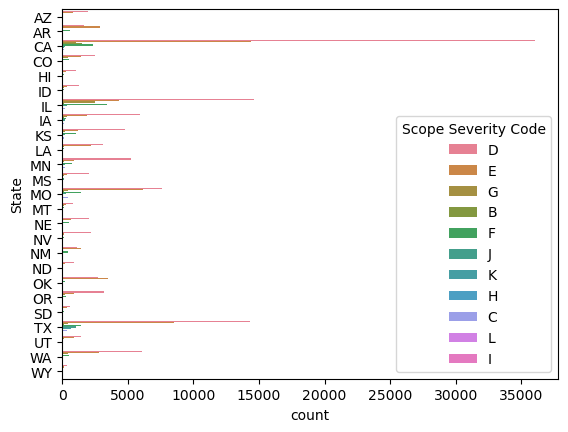

In [21]:
sns.countplot(data = west_states, y = 'State', hue = 'Scope Severity Code')
plt.show();

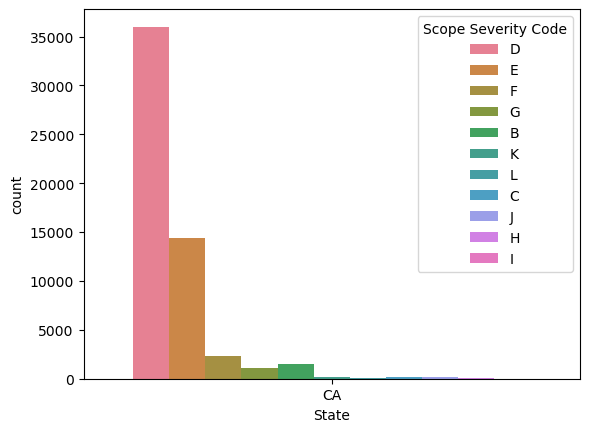

In [22]:
fig, ax = plt.subplots()
cal_df = west_states.loc[west_states['State'] == 'CA']
sns.countplot(data = cal_df, x = 'State', hue = 'Scope Severity Code')
plt.show();

In [23]:
cal_df['Scope Severity Code'].value_counts()

Scope Severity Code
D    36005
E    14393
F     2319
B     1539
G     1061
J      226
K      145
C      135
L       98
H       58
I        1
Name: count, dtype: int64

In [87]:
def scope_sev(df, rating, col):
    data = df
    rating_df = data.loc[data[col] == rating]

    comp_dict = {}

    for ind, row in rating_df.iterrows():
        key = row['State']
        value = row[col]

        if key not in comp_dict:
            comp_dict[key] = 0 
        comp_dict[key] += 1

    sorted_dict = dict(sorted(comp_dict.items(), reverse = True, key = lambda item : item[1]))
    
    if 'CA' in comp_dict:
        state = 'western states'
    else:
        state = 'eastern states'
   
    
    max_ = max(comp_dict, key = comp_dict.get)
    min_ = min(comp_dict, key = comp_dict.get)

    return f'The state with the most {rating} cases in the {state} is {max_}, with the lowest being {min_}'

In [88]:
scope_sev(west_states, 'L', 'Scope Severity Code')

'The state with the most L cases in the western states is CA, with the lowest being AR'

In [89]:
scope_sev(east_states, 'L', 'Scope Severity Code')

'The state with the most L cases in the eastern states is NJ, with the lowest being CT'

In [182]:
def scope_perc(df, rating, col, min_max):
    data = df
    rating_df = data.loc[data[col] == rating]

    comp_dict = {}

    for ind, row in rating_df.iterrows():
        key = row['State']
        value = row[col]

        if key not in comp_dict:
            comp_dict[key] = 0 
        comp_dict[key] += 1

    sorted_dict = dict(sorted(comp_dict.items(), reverse = True, key = lambda item : item[1]))
    
    if 'CA' in comp_dict:
        state = 'western states'
    else:
        state = 'eastern states'
   

    if min_max == max:
        max_ = max(comp_dict, key = comp_dict.get)
        max_df = data.loc[data['State'] == max_]
        max_df1 = max_df.loc[max_df['Scope Severity Code'] == rating]
        count = len(max_df1)
        total = len(rating_df)
        percent = round((count / total) * 100, 2)
        var = max_
        return f'{var} has {count} report(s) of {rating} cases, resulting in taking up {percent}% of total {rating} cases'
    
    else:
        min_ = min(comp_dict, key = comp_dict.get)
        min_df = data.loc[data['State'] == min_]
        min_df1 = min_df.loc[min_df['Scope Severity Code'] == rating]
        count = len(min_df1)
        total = len(rating_df)
        percent = round((count / total) * 100, 2)
        var = min_
        return f'{var} has {count} report(s) of {rating} cases, resulting in taking up {percent}% of total {rating} cases'

In [183]:
scope_perc(west_states, 'L', 'Scope Severity Code', max)

'CA has 98 report(s) of L cases, resulting in taking up 26.42% of total L cases'

In [184]:
scope_perc(west_states, 'L','Scope Severity Code', min)

'AR has 1 report(s) of L cases, resulting in taking up 0.27% of total L cases'

In [186]:
scope_perc(west_states, 'D','Scope Severity Code', max)

'CA has 36005 report(s) of D cases, resulting in taking up 29.1% of total D cases'

In [187]:
scope_perc(west_states, 'D','Scope Severity Code', min)

'WY has 364 report(s) of D cases, resulting in taking up 0.29% of total D cases'

# Recommendation 1
## Ensuring the Quality of Contractors

With the data showing distinct areas that are high in the `L` Scope Severity Code, we can clearly see that these areas need major attention, as this code signifies widespread immediate jeopardy to the residence health and safety. While mistakes do occur, as we are human, widespread pattern deficiencies are not human error, rather a lack of training, lack of care in the workspace, sinister intent, or all of the above. This can be a product of the contractors from _Clipboard Health_ or the full time employees on location. If the issue resided with the contractors, immediate suspension of the contractor may be necessary until a further investigation can be conducted to identify what is causing the issues with that specific individual. If _Clipboard Health_ is to be the best of the best, it may be a viable business move to incentivize personal growth of the contractors, with continued education being rewarded and reviwes from the facilities on individuals being a core aspect of the process. A rating from the facility on top of the _Clipboard Score_ could give more insight into an individual. A person who alwyas shows up to work can still be a bad employee. If _Clipboard Health_ contractors are not the cause of the issue, they can still make an impact on the facilities care for residence. With an _initiative and persistence_ mindset, contractors can themselves be the beacon of light that residence look towards, always being the best version of themselves, even if the workplace fights against that motive. Having reliable employees that always do whats right and always has the resident first is the easiets and most effective way for the company to grow, as building a reliable repuation is extremely important. 

When it comes to specifc locations that have a high reporing of consistant issues, It may also be important to look into where the responsable individuals were trained, as this could lead to a pattern of low quality contractors consistently being recruited from the same institutions. This can drastically effect the ability for _Clipboard Health_ to aquire new facilies as customers, as word of mouth is viable (and free) advertising.

# Pain Point System

Within the _CLipBoard Health APP_, I propose a contractor self identifying system, where a contractor can identify strenghts they possess, allowing for when facilities place a shift opening they can also but a tag on it that states a pain point they are currently having. This can send notifications to contractors that have that tag as a srength, allowing for a better match between contractors and facilities. This can be a major selling point for when creating partnerships with facilities as this apears to be an untapped market that _Clipboard Health_ can use to better suit the needs of facilities.